## DATASCI Health site near you

#### Visualization of Health Sites in Laguna and Cavite

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read shapefile
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


### Laguna Shape

In [5]:
lg = ph[ph["NAME_1"] == "Laguna"]

(120.9739776645, 121.6637939455, 13.9335974665, 14.6064129835)

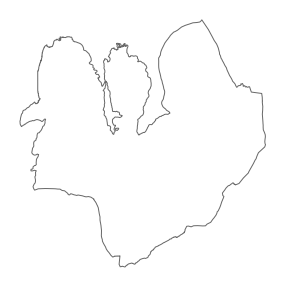

In [8]:
ax = lg.plot(figsize=(5,5), color="w", edgecolor="dimgray")
ax.axis('off')

### Cavite Shape

In [9]:
ca = ph[ph["NAME_1"] == "Cavite"]

(120.58987426750001, 121.0937500025, 14.039382313, 14.522227907)

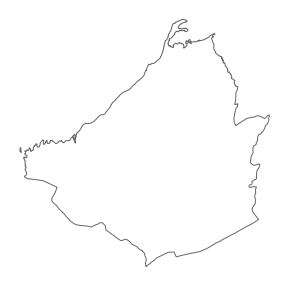

In [10]:
ax = ca.plot(figsize=(5,5), color="w", edgecolor="dimgray")
ax.axis('off')

### Health Site Data

In [33]:
# Read GeoJSON file
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [34]:
types = healthsites["amenity"].unique()
types

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

In [35]:
### Dropping null amenities
healthsites = healthsites[healthsites["amenity"] != ""]

In [56]:
types = healthsites["amenity"].unique()
types

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

### Laguna Amenities

In [57]:
subhealth = healthsites[healthsites["amenity"] == "pharmacy"]
sites_within = gpd.sjoin(subhealth, lg, op='within')
sites_within

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
9,1018210574,node,21.0,,pharmacy,,Marcelo H. del Pilar Avenue,,,96334310.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
19,7328321185,node,15.0,,pharmacy,,Manila East Road,,,89875377.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
92,4375248398,node,12.0,,pharmacy,,,,,78426672.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
96,1363220707,node,21.0,,pharmacy,,A. Flores,,,95723188.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
143,1427972764,node,21.0,,pharmacy,,Los Baños - Bay Road,,,87575807.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,2689610784,node,25.0,,pharmacy,,Santa Rosa - Tagaytay Road,,,63294186.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
10299,7328407487,node,9.0,,pharmacy,,,,,92689540.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
10393,5044226138,node,9.0,,pharmacy,,,,,59655467.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
10395,1546730947,node,9.0,,pharmacy,,,,,10602006.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


In [58]:
for type in types:
    subhealth = healthsites[healthsites["amenity"] == type]
    sites_within = gpd.sjoin(subhealth, lg, op='within')
    print(sites_within.shape)

(204, 49)
(40, 49)
(61, 49)
(77, 49)
(57, 49)
(0, 49)
(0, 49)
(0, 49)


<Figure size 1080x864 with 0 Axes>

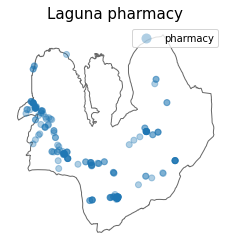

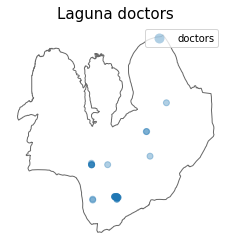

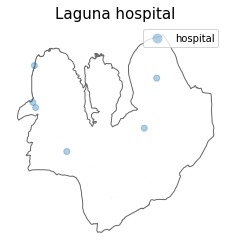

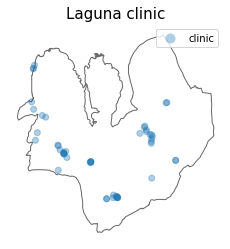

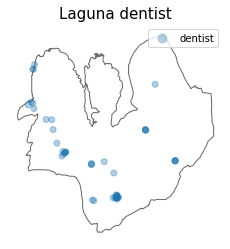

In [67]:
plt_ctr = 1
plt.figure(figsize=(15,12))
for type in types:
    subhealth = healthsites[healthsites["amenity"] == type]
    sites_within = gpd.sjoin(subhealth, lg, op='within')
    if(sites_within.shape[0] != 0):
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        lg.plot(ax=ax, color='white', edgecolor='dimgray')
        sites_within.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
        ax.set_title("Laguna " + type, fontsize=15)
        ax.axis('off');
    #sites_within.head()

### Cavite Amenities

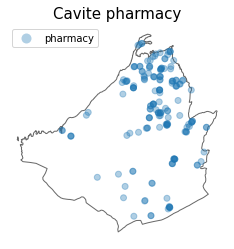

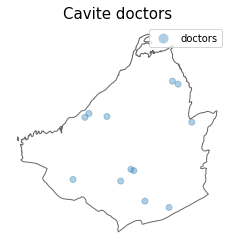

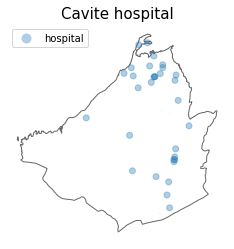

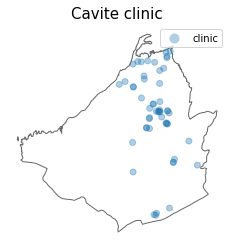

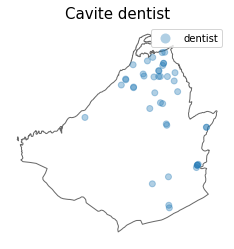

In [68]:
for type in types:
    subhealth = healthsites[healthsites["amenity"] == type]
    sites_within = gpd.sjoin(subhealth, ca, op='within')
    if(sites_within.shape[0] != 0):
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        ca.plot(ax=ax, color='white', edgecolor='dimgray')
        sites_within.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
        ax.set_title("Cavite " + type, fontsize=15)
        ax.axis('off');
    #sites_within.head()